<a href="https://colab.research.google.com/github/ganeshmukhiya/Simple-PHP/blob/master/Topic_Modeling_by_NMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF


In [3]:
# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Display dataset information
print(f"Total number of documents: {len(newsgroups.data)}")
print(f"Categories: {newsgroups.target_names}")


Total number of documents: 18846
Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
# Vectorize the dataset using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(newsgroups.data)

# Display the shape of the TF-IDF matrix
print(f"Shape of TF-IDF matrix: {tfidf.shape}")


Shape of TF-IDF matrix: (18846, 51840)


In [11]:
# Set the number of topics
n_topics = 20

# Fit the NMF model
nmf_model = NMF(n_components=n_topics, random_state=42)
W = nmf_model.fit_transform(tfidf)
H = nmf_model.components_

# Display the shape of W and H matrices
print(f"Shape of W (document-topic matrix): {W.shape}")
print(f"Shape of H (topic-term matrix): {H.shape}")


Shape of W (document-topic matrix): (18846, 20)
Shape of H (topic-term matrix): (20, 51840)


In [10]:
# Extract the feature names (words) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the top words for each topic
for topic_idx, topic in enumerate(H):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))


Topic #1:
don just people think like good know time did right
Topic #2:
windows thanks file dos program does know files mail use
Topic #3:
god jesus bible believe christ christian faith christians does sin
Topic #4:
drive scsi card ide disk hard controller drives bus floppy
Topic #5:
key chip encryption clipper government keys escrow use law algorithm


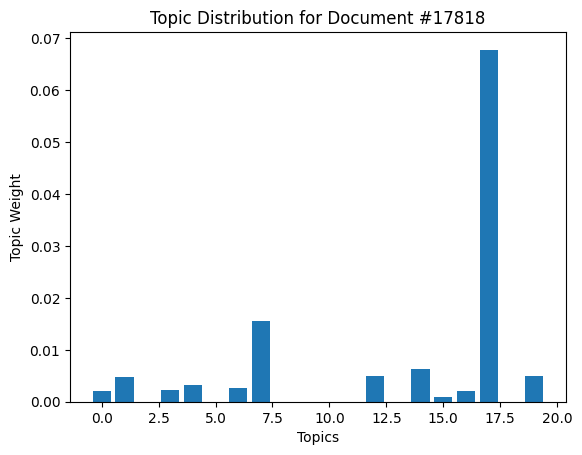

In [12]:
# Select a random document from the dataset
doc_id = np.random.randint(0, len(W))
topic_distribution = W[doc_id]

# Plot the topic distribution
plt.bar(range(n_topics), topic_distribution)
plt.xlabel('Topics')
plt.ylabel('Topic Weight')
plt.title(f'Topic Distribution for Document #{doc_id}')
plt.show()


In [8]:
from sklearn.decomposition import LatentDirichletAllocation

# Fit the LDA model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_W = lda_model.fit_transform(tfidf)
lda_H = lda_model.components_

# Display the top words for each LDA topic
for topic_idx, topic in enumerate(lda_H):
    print(f"LDA Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))


LDA Topic #1:
uv hm gm clint malarchuk freewill wk chemistry 517 hillary
LDA Topic #2:
windows thanks use drive card know does file program software
LDA Topic #3:
pluto atm lilley humanist grips duke manchester shims jupiter 200sx
LDA Topic #4:
pit ingr sas dtmedin catbyte b30 205 upenn easter ivy
LDA Topic #5:
key space launch chip algorithm des sci 11 april s1
LDA Topic #6:
people don just think like know time god good does
LDA Topic #7:
_____ w4wg imake com4 com3 gov winmarks __ autodesk chop
LDA Topic #8:
feustel test n9myi centaur ites cola jsc dickhead netcom hepatitis
LDA Topic #9:
ax nubus cview speedstar blaster projector c650 leftover turkey iivx
LDA Topic #10:
banks geb cadre chastity shameful n3jxp dsl skepticism intellect gordon
